**Objectives:**

* Learn to use Cross validation to pick the best models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt #work with date type

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

**1 - Load the data from “glass.csv” and make a bar plot of different types of glasses.**

In [64]:
#Loading our df
df = pd.read_csv('C:/Users/gabri/Desktop/Data Science/Python/Python for Data Science - Edureka/Module 14 - Model Selection and Boosting/glass.csv')

#Printing first five rows and shape
print(df.shape)
df.head()

(1509, 19)


,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN


<AxesSubplot:xlabel='Type'>

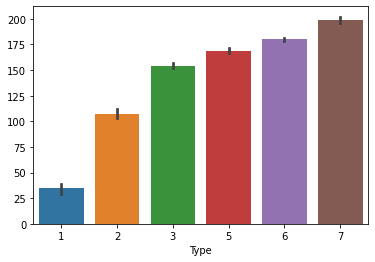

In [8]:
sns.barplot(x=df['Type'], y=df.index)

**2- Make a train_test split and fit a single decision tree classifier.**

In [11]:
from sklearn.model_selection import train_test_split # Split

from sklearn.tree import DecisionTreeClassifier # Model

In [9]:
X = df.drop('Type', axis=1)
y = df['Type']

#Printing results
print('X shape:', X.shape, '\ny shape:', y.shape)
X.head()

X shape: (214, 9) 
y shape: (214,)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

**3- Make a k-fold split with 3 splits and measure the accuracy score with each split [Hint:Refer to KFold module under sklearn’s model selection.]**

In [17]:
from sklearn import model_selection

In [18]:
kf = model_selection.KFold(n_splits=3)

In [20]:
results = model_selection.cross_val_score(model, X_train, y_train, cv=kf)
results

array([0.63157895, 0.73684211, 0.70175439])

**4- Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer alongwith a 10-fold cross validation.**


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
#Changing to 10-fold cross-validation
kf = model_selection.KFold(n_splits=10)

#Our new model
model2 = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

#Cross-validation
results_RFC = model_selection.cross_val_score(model2, X_test, y_test, cv=kf)
print(results_RFC.mean())

0.51


In [60]:
parameters = {'n_estimators':[100, 500], 'max_depth':[1, 8]}

clf = GridSearchCV(model2, parameters).fit(X_train, y_train)
clf.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [62]:
#Our new model
model3 = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0).fit(X_train, y_train)

#Cross-validation
results_RFC = model_selection.cross_val_score(model3, X_test, y_test, cv=kf)
print(results_RFC.mean())

0.5599999999999999
